# kNN Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
data = pd.read_csv('datasets/magic04.data', 
                   names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'])

data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
data['class'] = (data['class'] == 'g').astype(int)
data['class'].unique()

array([1, 0])

##### Data split

In [4]:
X = data.drop('class', axis=1)
y = data['class']

##### Scaling/Normalization

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(19020, 10)

In [6]:
X = X_scaled

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15216, 10) (3804, 10) (15216,) (3804,)


##### Cross validation

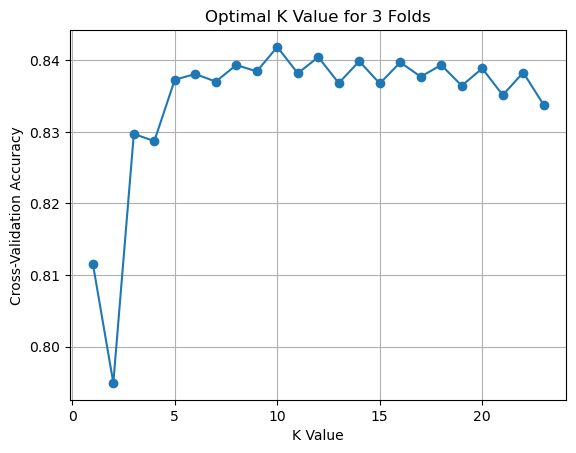

Optimal K value: 10


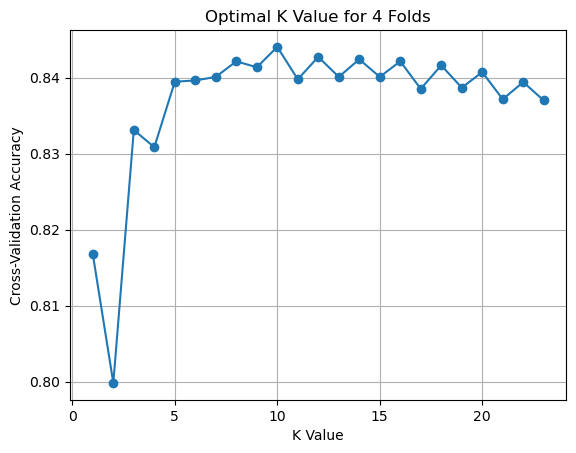

Optimal K value: 10


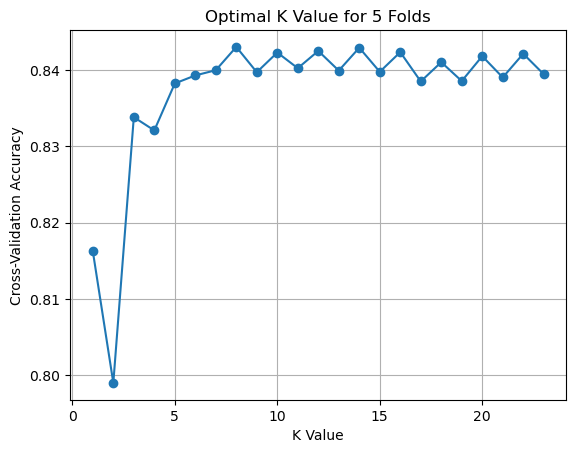

Optimal K value: 8


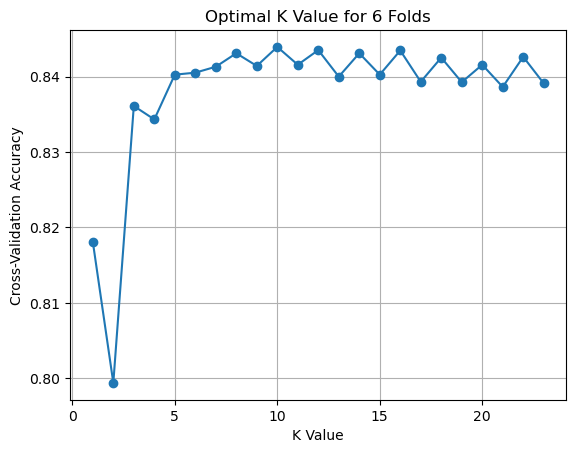

Optimal K value: 10


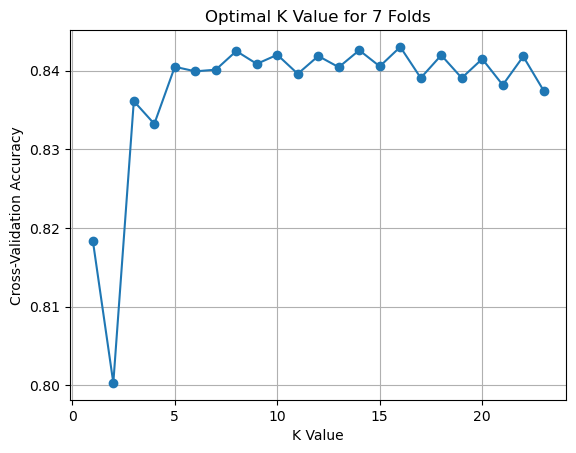

Optimal K value: 16


In [8]:
k_values = list(range(1, 24))

for fold in [3, 4, 5, 6, 7]:
    accuracy_scores = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=fold)
        accuracy_scores.append(np.mean(scores))

    plt.plot(k_values, accuracy_scores, marker='o')
    plt.xlabel('K Value')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(f'Optimal K Value for {fold} Folds')
    plt.grid()
    plt.show()

    optimal_k = k_values[np.argmax(accuracy_scores)]
    print("Optimal K value:", optimal_k)

##### Training function

In [9]:
def train_model(X, y, neighbours, iter_num):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=iter_num)
    
    knn_model = KNeighborsClassifier(n_neighbors=neighbours)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

##### Hyperparameter tuning

In [ ]:
accuracy = -1

for k in [8, 10, 13, 16]:
    for i in range(0, 2000):
        best_acc = train_model(X=X, y=y, neighbours=k, iter_num=i)
        
        if best_acc > accuracy:
            accuracy = best_acc
            print(f'Accuracy {round(accuracy, 7)} K {k} RandomState {i}')
            
        if i%100 == 0:
            print(f'---------------------------------------------------------------------------------> IterNum {i} k {k}')

Accuracy 0.8364879 K 8 RandomState 0
---------------------------------------------------------------------------------> IterNum 0 k 8
Accuracy 0.8388538 K 8 RandomState 1
Accuracy 0.8483176 K 8 RandomState 3
Accuracy 0.8564669 K 8 RandomState 6
---------------------------------------------------------------------------------> IterNum 100 k 8
---------------------------------------------------------------------------------> IterNum 200 k 8
---------------------------------------------------------------------------------> IterNum 300 k 8
---------------------------------------------------------------------------------> IterNum 400 k 8
---------------------------------------------------------------------------------> IterNum 500 k 8
---------------------------------------------------------------------------------> IterNum 600 k 8
---------------------------------------------------------------------------------> IterNum 700 k 8
--------------------------------------------------------------

acc old - 82.93